In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/do well/week 2/final_data.csv")
print(df.shape)
df.head()

(2000, 6)


,Unnamed: 0,M,T,W,Th,F
0,0,4.0,5.0,5.0,6.0,7.0
1,1,1.0,2.0,3.0,4.0,5.0
2,2,3.0,4.0,5.0,6.0,7.0
3,3,1.0,2.0,3.0,4.0,5.0
4,4,2.0,3.0,4.0,5.0,6.0


In [ ]:
W##df["student"] = np.nan
#for i in range(2000):
 # df["student"][i] = "Student"

In [ ]:
from sklearn.model_selection import train_test_split
train , test = train_test_split(df, test_size = 0.5)

x_train = train.drop('Unnamed: 0', axis=1)
y_train = train['W']

x_test = test.drop('Unnamed: 0', axis = 1)
y_test = test['W']

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test_scaled)

In [ ]:
#import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.040824829046386304
RMSE value for k=  2 is: 0.05
RMSE value for k=  3 is: 0.05137011669140816
RMSE value for k=  4 is: 0.06081049799719344
RMSE value for k=  5 is: 0.06467869303977418
RMSE value for k=  6 is: 0.07224892668688862
RMSE value for k=  7 is: 0.07377111135633174
RMSE value for k=  8 is: 0.07491314415152169
RMSE value for k=  9 is: 0.08066722783194262
RMSE value for k=  10 is: 0.08580501150865255
RMSE value for k=  11 is: 0.08914964050518576
RMSE value for k=  12 is: 0.09363418772601763
RMSE value for k=  13 is: 0.10103019643510537
RMSE value for k=  14 is: 0.10614615773885124
RMSE value for k=  15 is: 0.11222497246354951
RMSE value for k=  16 is: 0.11376602451230039
RMSE value for k=  17 is: 0.11645226633469499
RMSE value for k=  18 is: 0.11899138883668829
RMSE value for k=  19 is: 0.12153792882900515
RMSE value for k=  20 is: 0.12203995247458924


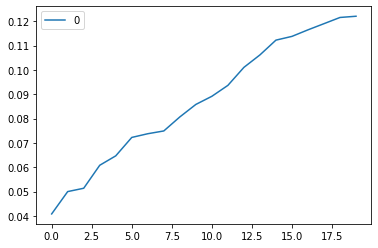

In [ ]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val)  
curve.plot()

##### prepearing the sample data

In [ ]:
dd = pd.read_csv("/content/drive/MyDrive/do well/week 2/final_data.csv")
dd = dd.drop(dd.index[600:2000])
dd = dd.drop("Unnamed: 0", axis = 1)

In [ ]:
dd

,M,T,W,Th,F
0,4.0,5.0,5.0,6.0,7.0
1,1.0,2.0,3.0,4.0,5.0
2,3.0,4.0,5.0,6.0,7.0
3,1.0,2.0,3.0,4.0,5.0
4,2.0,3.0,4.0,5.0,6.0
...,...,...,...,...,...
595,2.0,3.0,4.0,5.0,6.0
596,1.0,2.0,3.0,4.0,5.0
597,4.0,5.0,5.0,6.0,7.0
598,4.0,5.0,5.0,6.0,7.0


In [ ]:

dd.to_csv("/content/drive/MyDrive/do well/sample_data.csv")

In [ ]:
test

,0,1,2,3,4
0,0.75,1.000,1.0,1.0,1.000000
1,0.50,0.750,0.8,1.0,1.000000
2,0.50,0.750,0.8,1.0,1.000000
3,0.00,0.125,0.4,0.4,0.333333
4,0.25,0.500,0.6,0.8,0.833333
...,...,...,...,...,...
595,0.00,0.250,0.4,0.6,0.666667
596,0.50,0.500,0.4,0.6,0.666667
597,0.25,0.500,0.6,0.8,0.833333
598,0.00,0.000,0.0,0.2,0.166667


In [ ]:
train = train.drop("Unnamed: 0", axis =1)

In [ ]:
#reading test and submission files
test = pd.DataFrame(x_test_scaled)
submission = dd
submission['M'] = test[0]
submission['T'] = test[1]

In [ ]:
#preprocessing test dataset
#test.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1, inplace=True)
#test['Item_Weight'].fillna(mean, inplace =True)
test = pd.get_dummies(test)
test_scaled = scaler.fit_transform(test)
test = pd.DataFrame(test_scaled)

In [ ]:
#predicting on the test set and creating submission file
predict = model.predict(test)
submission['M'] = predict
submission["T"] = predict
submission['W'] = predict
submission["TH"] = predict
submission['F'] = predict
submission.to_csv('/content/drive/MyDrive/do well/predicted.csv',index=False)

In [ ]:
train.shape
train = train.drop(train.index[600:1400])

In [ ]:
#predicting on the test set and creating submission file
predict = model.predict(train)
submission['M'] = predict
submission["T"] = predict
submission['W'] = predict
submission["TH"] = predict
submission['F'] = predict
submission.to_csv('/content/drive/MyDrive/do well/predicted_with_train.csv',index=False)

In [ ]:
test.shape

(600, 5)

#### implementing grid search cv

In [ ]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(x_train,y_train)
model.best_params_

{'n_neighbors': 2}